# Pregunta 1: Reducción de Dimensionalidad para Clasificación

## a) Construcción y descripción del dataframe

In [1]:
import urllib
import pandas as pd

#train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
#test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
#train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
#test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

n_train = len(train_df)
print n_train
#train_df.head()
#test_df.tail()

528


## b) Construcción de matrices y normalización

In [2]:
from sklearn.preprocessing import StandardScaler

X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

## c) PCA: Reducción de dimensionalidad

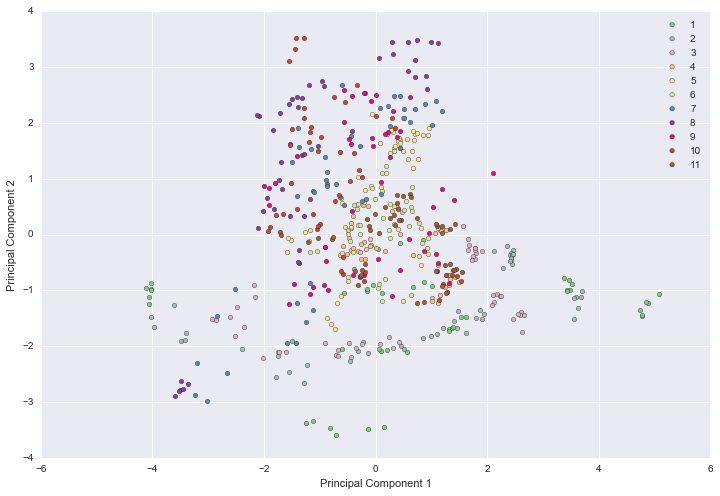

In [4]:
%matplotlib inline

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)

cmap = plt.cm.get_cmap('Accent')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## d) LDA: Reducción de dimensionalidad

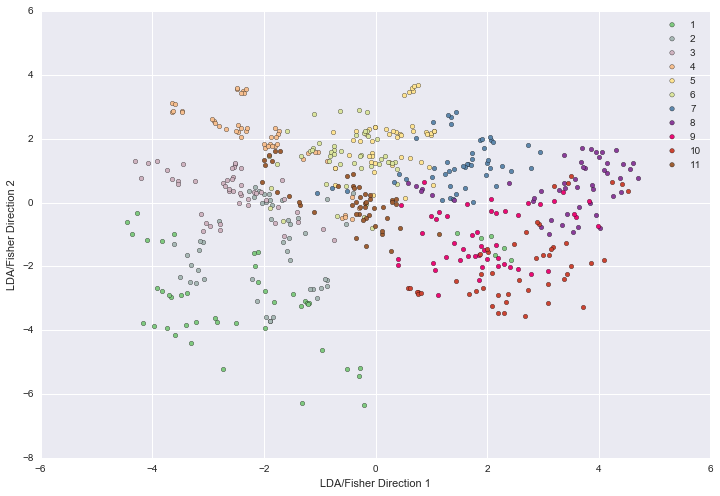

In [6]:
from sklearn.lda import LDA

sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Accent')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
    
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

## e) Comparación de resultados anteriores: PCA y LDA

## f) Construcción de clasificador a-priori

In [7]:
import random

def a_priori_classifier(x):
    return random.choice(y)

# test:
l = []
n=10000
for i in range(n):
    l = l + [a_priori_classifier("test")]
    
import collections

counter=collections.Counter(l)

for i in counter:
    print counter[i]/float(n)

0.0936
0.0924
0.088
0.0935
0.0922
0.0913
0.0873
0.0867
0.0905
0.0938
0.0907


## g) Clasificadores LDA, QDA y k-NN

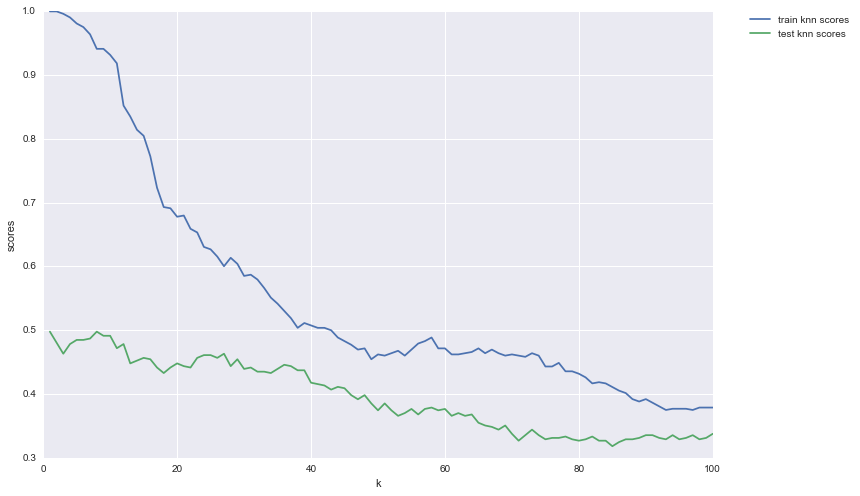

In [9]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier

Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values

X_std_test = StandardScaler().fit_transform(Xtest)

#LDA
lda_model = LDA()
lda_model.fit(X_std,y)

train_lda_score = lda_model.score(X_std,y)
test_lda_score = lda_model.score(X_std_test,ytest)

#QDA
qda_model = QDA()
qda_model.fit(X_std,y)

train_qda_score = qda_model.score(X_std,y)
test_qda_score = qda_model.score(X_std_test,ytest)

#k-NN
limit_k = 101
train_knn_scores_list = []
test_knn_scores_list = []
for k in range(1,limit_k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_std,y)

    train_knn_score = knn_model.score(X_std,y)
    test_knn_score = knn_model.score(X_std_test,ytest)

    train_knn_scores_list.append(train_knn_score)
    test_knn_scores_list.append(test_knn_score)

plt.figure(figsize=(12, 8))
plt.plot(range(1,limit_k), train_knn_scores_list, label="train k-NN")
plt.plot(range(1,limit_k), test_knn_scores_list, label="test k-NN")
plt.ylabel('scores')
plt.xlabel('k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## h) Clasificadores LDA, QDA y k-NN sobre data reducida mediante PCA

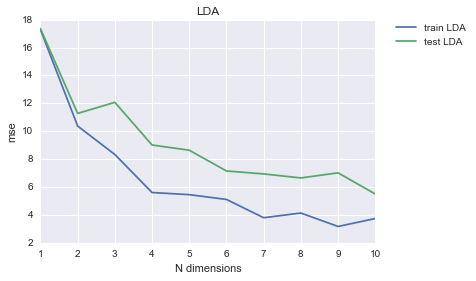

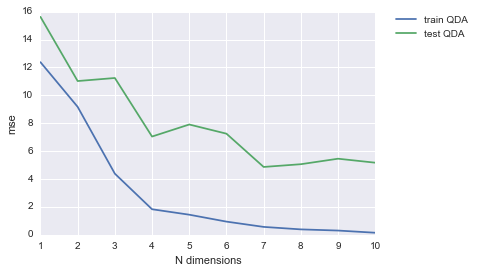

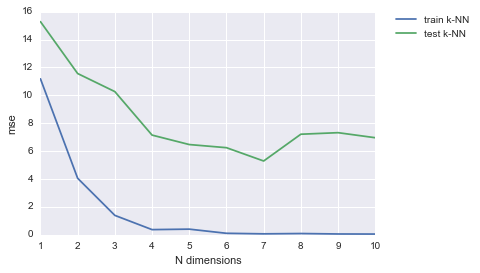

In [22]:
lda_mse_train_list = []
lda_mse_test_list = []
qda_mse_train_list = []
qda_mse_test_list = []
knn_mse_train_list = []
knn_mse_test_list = []
for d in range(1,11):
    sklearn_pca = PCA(n_components=d)
    Xred_pca = sklearn_pca.fit_transform(X_std)
    Xred_pca_test = sklearn_pca.transform(X_std_test)
    
    #LDA
    lda_model = LDA()
    lda_model.fit(Xred_pca,y)
    
    lda_predictions_train = lda_model.predict(Xred_pca)
    lda_predictions_test = lda_model.predict(Xred_pca_test)
    
    lda_residuals_train = lda_predictions_train - y
    lda_residuals_test = lda_predictions_test - ytest
    
    lda_mse_train = np.mean(np.power(lda_residuals_train, 2))
    lda_mse_test = np.mean(np.power(lda_residuals_test, 2))
    
    lda_mse_train_list.append(lda_mse_train)
    lda_mse_test_list.append(lda_mse_test)
    
    #QDA
    qda_model = QDA()
    qda_model.fit(Xred_pca,y)
    
    qda_predictions_train = qda_model.predict(Xred_pca)
    qda_predictions_test = qda_model.predict(Xred_pca_test)
    
    qda_residuals_train = qda_predictions_train - y
    qda_residuals_test = qda_predictions_test - ytest
    
    qda_mse_train = np.mean(np.power(qda_residuals_train, 2))
    qda_mse_test = np.mean(np.power(qda_residuals_test, 2))
    
    qda_mse_train_list.append(qda_mse_train)
    qda_mse_test_list.append(qda_mse_test)
    
    #k-NN
    knn_model = KNeighborsClassifier()
    knn_model.fit(Xred_pca,y)
    
    knn_predictions_train = knn_model.predict(Xred_pca)
    knn_predictions_test = knn_model.predict(Xred_pca_test)
    
    knn_residuals_train = knn_predictions_train - y
    knn_residuals_test = knn_predictions_test - ytest
    
    knn_mse_train = np.mean(np.power(knn_residuals_train, 2))
    knn_mse_test = np.mean(np.power(knn_residuals_test, 2))

    knn_mse_train_list.append(knn_mse_train)
    knn_mse_test_list.append(knn_mse_test)

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), lda_mse_train_list, label="train LDA")
plt.plot(range(1,11), lda_mse_test_list, label="test LDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("LDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), qda_mse_train_list, label="train QDA")
plt.plot(range(1,11), qda_mse_test_list, label="test QDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("QDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), knn_mse_train_list, label="train k-NN")
plt.plot(range(1,11), knn_mse_test_list, label="test k-NN")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("k-NN")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## i) Clasificadores LDA, QDA y k-NN sobre data reducida mediante LDA

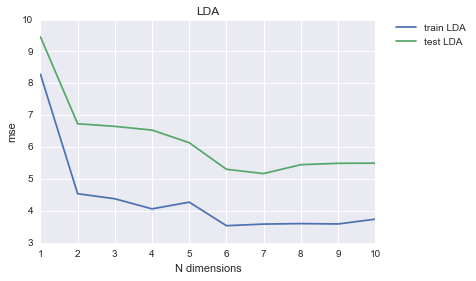

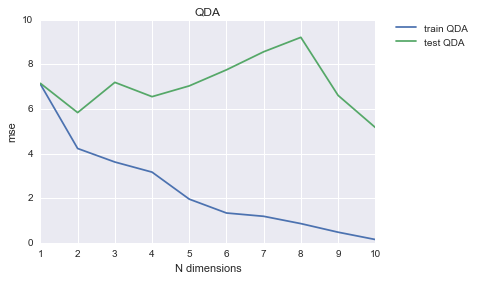

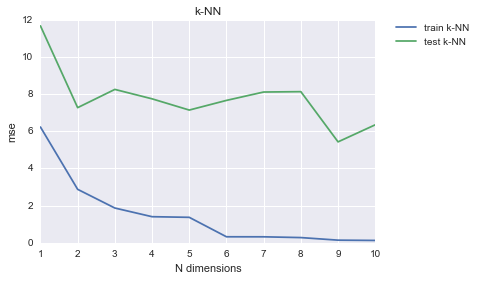

In [25]:
lda_mse_train_list = []
lda_mse_test_list = []
qda_mse_train_list = []
qda_mse_test_list = []
knn_mse_train_list = []
knn_mse_test_list = []
for d in range(1,11):
    sklearn_lda = LDA(n_components=d)
    Xred_lda = sklearn_lda.fit_transform(X_std, y)
    Xred_lda_test = sklearn_lda.transform(X_std_test)
    
    #LDA
    lda_model = LDA()
    lda_model.fit(Xred_lda,y)
    
    lda_predictions_train = lda_model.predict(Xred_lda)
    lda_predictions_test = lda_model.predict(Xred_lda_test)
    
    lda_residuals_train = lda_predictions_train - y
    lda_residuals_test = lda_predictions_test - ytest
    
    lda_mse_train = np.mean(np.power(lda_residuals_train, 2))
    lda_mse_test = np.mean(np.power(lda_residuals_test, 2))
    
    lda_mse_train_list.append(lda_mse_train)
    lda_mse_test_list.append(lda_mse_test)
    
    #QDA
    qda_model = QDA()
    qda_model.fit(Xred_lda,y)
    
    qda_predictions_train = qda_model.predict(Xred_lda)
    qda_predictions_test = qda_model.predict(Xred_lda_test)
    
    qda_residuals_train = qda_predictions_train - y
    qda_residuals_test = qda_predictions_test - ytest
    
    qda_mse_train = np.mean(np.power(qda_residuals_train, 2))
    qda_mse_test = np.mean(np.power(qda_residuals_test, 2))
    
    qda_mse_train_list.append(qda_mse_train)
    qda_mse_test_list.append(qda_mse_test)
    
    #k-NN
    knn_model = KNeighborsClassifier()
    knn_model.fit(Xred_lda,y)
    
    knn_predictions_train = knn_model.predict(Xred_lda)
    knn_predictions_test = knn_model.predict(Xred_lda_test)
    
    knn_residuals_train = knn_predictions_train - y
    knn_residuals_test = knn_predictions_test - ytest
    
    knn_mse_train = np.mean(np.power(knn_residuals_train, 2))
    knn_mse_test = np.mean(np.power(knn_residuals_test, 2))

    knn_mse_train_list.append(knn_mse_train)
    knn_mse_test_list.append(knn_mse_test)

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), lda_mse_train_list, label="train LDA")
plt.plot(range(1,11), lda_mse_test_list, label="test LDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("LDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), qda_mse_train_list, label="train QDA")
plt.plot(range(1,11), qda_mse_test_list, label="test QDA")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("QDA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), knn_mse_train_list, label="train k-NN")
plt.plot(range(1,11), knn_mse_test_list, label="test k-NN")
plt.ylabel('mse')
plt.xlabel('N dimensions')
plt.title("k-NN")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()